## Patinagem no CartPole

> **Problema**: Se o Pedro quer escapar do lobo, ele precisa ser capaz de se mover mais rápido do que ele. Vamos ver como o Pedro pode aprender a patinar, em particular, a manter o equilíbrio, utilizando Q-Learning.

Primeiro, vamos instalar o gym e importar as bibliotecas necessárias:


In [1]:
#code block 1

## Criar um ambiente cartpole


In [ ]:
#code block 2

Para ver como o ambiente funciona, vamos executar uma simulação curta de 100 passos.


In [ ]:
#code block 3

Durante a simulação, precisamos obter observações para decidir como agir. Na verdade, a função `step` devolve-nos as observações atuais, a função de recompensa e a bandeira `done` que indica se faz sentido continuar a simulação ou não:


In [ ]:
#code block 4

Podemos obter o valor mínimo e máximo desses números:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

Vamos também explorar outro método de discretização usando intervalos:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


Vamos agora executar uma breve simulação e observar esses valores discretos do ambiente.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


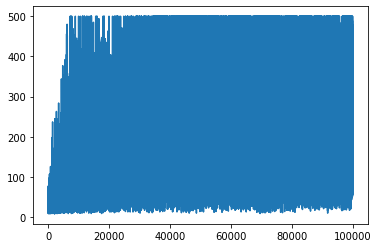

In [20]:
plt.plot(rewards)

A partir deste gráfico, não é possível determinar nada, porque devido à natureza do processo de treino estocástico, a duração das sessões de treino varia bastante. Para dar mais sentido a este gráfico, podemos calcular a **média móvel** ao longo de uma série de experiências, digamos 100. Isto pode ser feito convenientemente usando `np.convolve`:


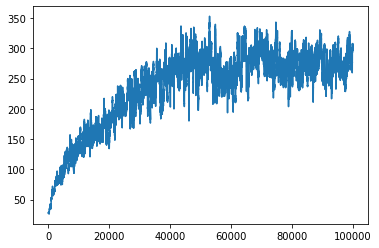

In [22]:
#code block 12

## Variando os Hiperparâmetros e Observando o Resultado na Prática

Agora seria interessante ver como o modelo treinado se comporta. Vamos executar a simulação, seguindo a mesma estratégia de seleção de ações utilizada durante o treino: amostragem de acordo com a distribuição de probabilidades na Q-Table:


In [23]:
# code block 13

## Guardar o resultado num GIF animado

Se quiser impressionar os seus amigos, pode enviar-lhes a imagem animada do poste de equilíbrio em formato GIF. Para isso, podemos usar `env.render` para produzir um fotograma de imagem e, em seguida, guardar esses fotogramas num GIF animado utilizando a biblioteca PIL:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**Aviso Legal**:  
Este documento foi traduzido utilizando o serviço de tradução por IA [Co-op Translator](https://github.com/Azure/co-op-translator). Embora nos esforcemos para garantir a precisão, é importante notar que traduções automáticas podem conter erros ou imprecisões. O documento original na sua língua nativa deve ser considerado a fonte autoritária. Para informações críticas, recomenda-se a tradução profissional realizada por humanos. Não nos responsabilizamos por quaisquer mal-entendidos ou interpretações incorretas decorrentes da utilização desta tradução.
